<a href="https://colab.research.google.com/github/Katkins178/KendallA_DTSC4050_Fall2025/blob/main/KA0955_DTSC4050_Wk_7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. The Problem

  - A medium size marketing firm wants to know if the E-mail subject line length has an effect on consumers opening the email

2. Main Goals

  - Increase email open rate by 5% over a 14-day period

3. Questions to Address
  - Is the difference in open rates between short and long subject lines statistically significant?

4. End Product
  - The Marketing team is our target audience. Because they are non technical it is more important to explain the results in simple terms, rather than the methodology
  - I would present a powerpoint and a written report, making sure to include visual aids

5. Prior Knowledge
  - I am assuming the company already knows the current open rate
  - I expect shorter subject lines to have a higher open rate do to the increaese in mobile commerce

6. Data Preperation
  - Fields and Meanings
    - user_id (nominal)
    - email_version (A or B)
    - open (binary)
  - Modifications
    - Catergorize device_type
  - Data Cleaning
    - remove duplicate users
    - remove users with missing open values
    - ensure open values are only 0 or 1
  - Enriching
    - Adding device_type (mobile or desktop)
    - Adding demographic data
    - This will help us know whether certain groups respond differently
  - Data Consistency
    - Each user_id can only appear once. This ensures they only have one email_version
  - Missing Values
    - We will delete the whole row if there are missing values. The scope is so narrow that missing any information would make it unusable
    - If we are including device_type and demographics. We can fill with a Nan or "Unknown"
  - Scaling
    - No scale is needed, there is no numerical data
  - Justification
    - I removed bad or incomplete data to avoid bias
    - I added simple extra collumns to help analyze device and demographic differences
    - I avoided complex transformations with the main metric being binary
    - Keeping the dataset clean ensures that the A/B comparison reflects the true user behavior

7. Exploratory Data Analysis

Version A (Short Subject Line): Conversion Rate = 0.1900
Version B (Long Subject Line): Conversion Rate = 0.2450
Z-statistic: -2.9862
P-value: 0.0029
Result: Statistically significant. Reject the null hypothesis.
Version B (Short Subject Line) performed better.


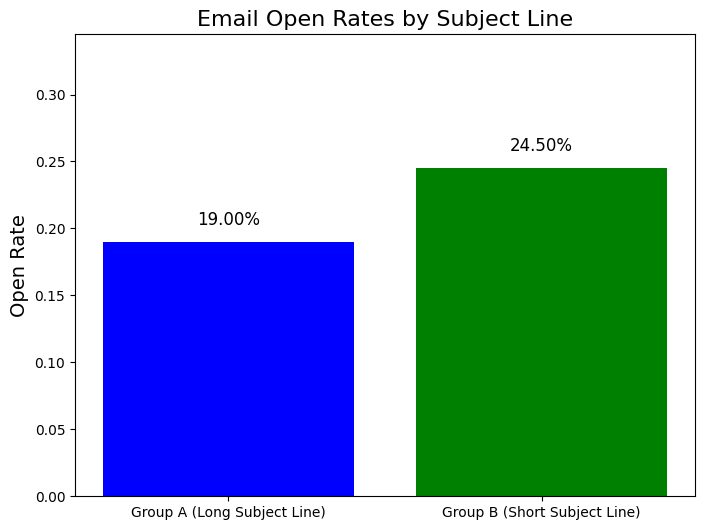

In [74]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulated data
np.random.seed(17)  # For reproducibility

# Number of users in each group
n_A = 1000
n_B = 1000

# Simulated open rates
conversion_rate_A = 0.20  # 20% for long subject
conversion_rate_B = 0.25  # 25% for short subject

# Generate simulated data (1 = email opened, 0 = email not opened)
opens_A = np.random.choice([1, 0], size=n_A, p=[conversion_rate_A, 1 - conversion_rate_A])
opens_B = np.random.choice([1, 0], size=n_B, p=[conversion_rate_B, 1 - conversion_rate_B])

# Calculate conversion rates from the simulated data.
actual_conversion_rate_A = np.mean(opens_A)
actual_conversion_rate_B = np.mean(opens_B)

print(f"Version A (Short Subject Line): Conversion Rate = {actual_conversion_rate_A:.4f}")
print(f"Version B (Long Subject Line): Conversion Rate = {actual_conversion_rate_B:.4f}")

# Perform a two-sample z-test (or a chi-squared test for proportions, which is more common)
#Here we will use the z-test.
z_stat, p_value = stats.ttest_ind(opens_A, opens_B) #Using ttest because we are using binary data.

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Determine statistical significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Result: Statistically significant. Reject the null hypothesis.")
    if actual_conversion_rate_B > actual_conversion_rate_A:
        print("Version B (Short Subject Line) performed better.")

# Data for the bar chart
versions = ['Group A (Long Subject Line)', 'Group B (Short Subject Line)']
conversion_rates = [actual_conversion_rate_A, actual_conversion_rate_B]
colors = ['blue', 'green']

# Create the bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(versions, conversion_rates, color=colors)

# Add conversion rate labels on top of the bars
for bar, rate in zip(bars, conversion_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{rate:.2%}",
             ha='center', va='bottom', fontsize=12)

# Chart title and labels
plt.title("Email Open Rates by Subject Line", fontsize=16)
plt.ylabel("Open Rate", fontsize=14)
plt.ylim(0, max(conversion_rates) + 0.1)  # Add some space above the bars

plt.show()


8. Storytelling
  - The marketing team wants to increase email open rates. A simple change in the subject line length could improve engagement, but we need data to confirm.
  - The null hypothesis was rejected. Meaning that the data shows statistically significant evidence that the short subject line leads to more email openings than the long subject line.
  - If we sent 100,000 emails
    - Long subject: 19,000
    - Short subject: 24,500
    - 5,500 additional opens by changing the subject line
  - Based on the analysis the shorter subject line should be used in future campaigns

9. Analysis and Ethical Considerations
  - Hypothesis Testing
    - H0: There is no difference in open rates between the long subject line and the short subject line
    - H1: The short subject line has a higher open rate than the long subject line
    - Long Subject: Open rate = 19%
    - Short Subject: Open rate = 24.5%
  - Statistical Test
    - Z-Statistic: -2.9862
    - P-value: 0.0029
  - Interpretation
    - P-value < 0.05, so we reject the null hypothesis
  - Ethical Considerations
    - Avoid bias in group assignment
    - Subject line content should be the same in both groups
    - Only necessary email data should be collected

A/A Test

A/A Test - Group A Open Rate: 0.2060
A/A Test - Group B Open Rate: 0.2060
T-statistic: 0.0000
P-value: 1.0000
No significant difference: randomization works as expected.


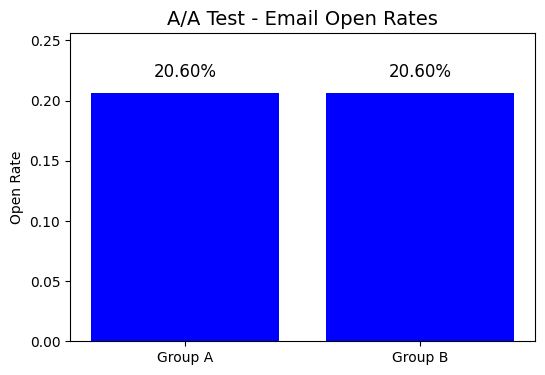

In [ ]:
n_users = 1000  # users per group

# Both groups get the "same" email (long subject line)
conversion_rate = 0.20  # 20% open rate for both

opens_A = np.random.choice([1, 0], size=n_users, p=[conversion_rate, 1 - conversion_rate])
opens_B = np.random.choice([1, 0], size=n_users, p=[conversion_rate, 1 - conversion_rate])

# Calculate open rates
rate_A = np.mean(opens_A)
rate_B = np.mean(opens_B)

print(f"A/A Test - Group A Open Rate: {rate_A:.4f}")
print(f"A/A Test - Group B Open Rate: {rate_B:.4f}")

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(opens_A, opens_B)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Unexpected result: significant difference detected! Check randomization.")
else:
    print("No significant difference: randomization works as expected.")

# Simple bar chart
versions = ['Group A', 'Group B']
rates = [rate_A, rate_B]
colors = ['blue', 'blue']  # both same version

plt.figure(figsize=(6,4))
bars = plt.bar(versions, rates, color=colors)

for bar, rate in zip(bars, rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{rate:.2%}",
             ha='center', va='bottom', fontsize=12)

plt.title("A/A Test - Email Open Rates", fontsize=14)
plt.ylabel("Open Rate")
plt.ylim(0, max(rates) + 0.05)
plt.show()